In [1]:
import sys
import pandas as pd
import numpy as np
sys.path.append('..')

import matplotlib.pyplot as plt

from noaa.daily import stations_info, hist_daily
from extremevalue.gpd import GPDMLE

In [2]:
def has_gap_violation(s0,max_gap=100):
    s1 = s0.isna().rolling(100).sum()
    return (s1==100).sum() > 0

In [3]:
stations_all = stations_info(element='PRCP')

In [4]:
# stations_all.to_hdf('./stations_store.h5', 'data')  

In [3]:
stations_hist = stations_all.loc[lambda df:(df['date_min']<'1960-01-01') & (df['date_max']>'2022-01-01')  & (df['date_count']>20000)]
# stations_hist.query("""latitude < 24 and longitude > 68  and latitude > 0 and longitude <80""").sort_values('date_count')

In [4]:
stations_NY = stations_hist.loc[lambda df:df['state']=='NY']


In [5]:
PRCP_NY = hist_daily(stations_NY.index,'PRCP',use_gbq=True)

Downloading: 100%|██████████|


In [6]:
PRCP_NY2 = hist_daily(stations_NY.index,'PRCP',use_gbq=False)

In [2]:
PRCP_NY

NameError: name 'PRCP_NY' is not defined

In [8]:
PRCP_NY2

id,USC00300055,USC00300063,USC00300085,USC00300093,USC00300183,USC00300220,USC00300321,USC00300331,USC00300343,USC00300379,...,USW00014743,USW00014750,USW00014757,USW00014768,USW00014771,USW00094725,USW00094728,USW00094745,USW00094789,USW00094790
date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1876-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,NaN,NaN
1876-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1876-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1876-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-06,NaN,0.0,0.0,6.1,0.0,0.3,0.0,0.0,0.0,NaN,...,NaN,11.9,8.4,0.3,7.4,6.1,26.7,17.3,10.9,6.4
2022-12-07,NaN,7.6,0.0,0.3,1.3,0.8,9.7,5.3,0.3,7.9,...,NaN,9.4,6.1,0.0,3.3,1.5,6.6,10.4,7.9,2.3
2022-12-08,0.0,0.0,1.5,0.5,2.5,1.3,4.8,3.3,0.0,1.3,...,NaN,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0


In [30]:
s1  = pd.to_datetime(PRCP_NY['date'], format="%Y-%m-%d", errors="coerce")

In [29]:
# s2 = s_test.apply(lambda s: pd.to_datetime(s))
s2 = pd.to_datetime(PRCP_NY['date'], infer_datetime_format=True)

In [28]:
s3 = pd.to_datetime(PRCP_NY['date'])

In [38]:
s4 = PRCP_NY['date'].astype("datetime64[ns]")

In [39]:
stations_all[['date_min','date_max']].astype("datetime64[ns]")

,date_min,date_max
id,,
EZE00100082,1804-05-01,2005-04-30
ITE00100550,1813-01-01,2007-12-31
GM000004204,1826-12-01,2022-10-31
GM000010962,1781-01-01,2022-10-31
ITE00100552,1833-01-01,2008-12-31
...,...,...
US1OHPT0015,2019-12-02,2019-12-02
USC00447129,1947-02-04,1947-02-04
USC00457905,1915-01-01,1915-01-01


In [14]:
PRCP_NY_1 = PRCP_NY.loc['1960-01-01':,~PRCP_NY.loc['1960-01-01':].apply(has_gap_violation)].copy()
PRCP_NY_1 = PRCP_NY_1.fillna(0.0)

In [16]:
rl_10y = pd.Series(index=PRCP_NY_1.columns,dtype=float)
rl_10y_se = pd.Series(index=PRCP_NY_1.columns,dtype=float)
rl_100y = pd.Series(index=PRCP_NY_1.columns,dtype=float)
rl_100y_se = pd.Series(index=PRCP_NY_1.columns,dtype=float)

gpd = GPDMLE(30.0)

for station, ts in PRCP_NY_1.items():
    gpd.fit(ts.values)

    rl_10y[station] = gpd.return_level(10.0, period=365.25)
    rl_10y_se[station] = gpd.return_level_se(10.0, period=365.25)

    rl_100y[station] = gpd.return_level(100.0, period=365.25)
    rl_100y_se[station] = gpd.return_level_se(100.0, period=365.25)

Optimization terminated successfully.
         Current function value: 961.147643
         Iterations: 69
         Function evaluations: 130
Optimization terminated successfully.
         Current function value: 823.568577
         Iterations: 63
         Function evaluations: 123
Optimization terminated successfully.
         Current function value: 764.796319
         Iterations: 82
         Function evaluations: 158
Optimization terminated successfully.
         Current function value: 753.980543
         Iterations: 72
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: 1222.800233
         Iterations: 73
         Function evaluations: 137
Optimization terminated successfully.
         Current function value: 1833.056659
         Iterations: 70
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: 854.169127
         Iterations: 76
         Function evaluations: 142
Optimizatio

In [32]:
NY_mean = PRCP_NY_1.mean()
NY_max = PRCP_NY_1.max()
NY_rl = pd.concat([rl_10y, rl_10y_se, rl_100y, rl_100y_se,NY_mean,NY_max],keys=['10y', '10y_se', '100y', '100y_se','mean', 'max'],axis=1).sort_values('10y')

In [34]:
NY_rl_info = NY_rl.join(stations_NY[['name','state','latitude','longitude','elevation']])
NY_rl_info

,10y,10y_se,100y,100y_se,mean,max,name,state,latitude,longitude,elevation
id,,,,,,,,,,,
USC00303773,68.048405,3.411914,93.177172,9.478309,2.382996,103.9,HEMLOCK,NY,42.7742,-77.6083,274.9
USC00301152,68.228578,2.788864,86.802918,6.255802,2.324207,94.2,CANANDAIGUA 3 S,NY,42.8450,-77.2808,219.5
USC00301580,69.238297,3.261173,93.534521,8.279752,2.269090,103.6,CLYDE LOCK 26,NY,43.0589,-76.8383,119.5
USC00305597,70.554867,4.239824,101.786554,13.729776,2.023598,94.0,MT MORRIS 2 W,NY,42.7314,-77.9053,268.2
USC00305714,71.148021,3.269099,95.374974,8.522165,2.838762,100.6,NEWCOMB,NY,43.9708,-74.2219,502.0
USC00305679,71.646323,3.730848,100.019334,10.387261,2.212484,112.0,NEWARK,NY,43.0467,-77.0842,131.1
USW00014768,71.728577,4.117572,101.015366,12.606074,2.323542,88.1,ROCHESTER GTR INTL AP,NY,43.1167,-77.6767,162.5
USW00094725,72.106910,4.577699,109.818851,15.243908,2.351894,126.2,MASSENA INTL AP,NY,44.9358,-74.8458,65.2
USC00301265,73.580454,4.543529,108.942532,14.816805,2.274805,114.6,CAYUGA LOCK #1,NY,42.9481,-76.7342,115.8


In [40]:
IND = hist_daily(['IN012190100','IN009010100'],'PRCP')

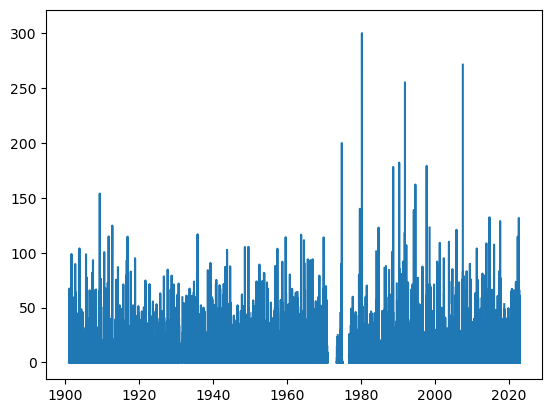

In [41]:
plt.plot(IND['IN009010100'])

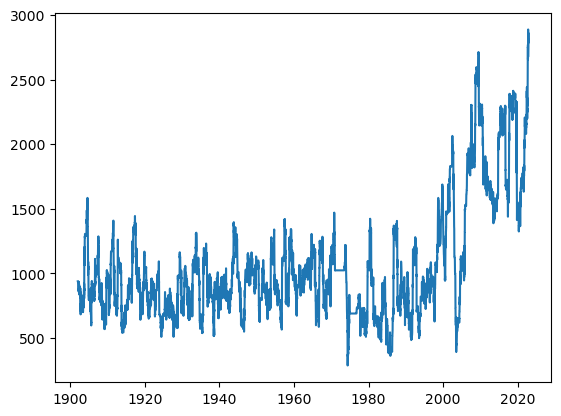

In [42]:
plt.plot(IND['IN009010100'].fillna(0).rolling(365).sum())

In [43]:
def season(month_int):
    if month_int in (12,1,2):
        return 'winter'
    elif month_int in (3,4,5):
        return 'spring'
    elif month_int in (6,7,8):
        return 'summer'
    else:
        return 'autumn'

df0 = IND['IN009010100']
df = df0.reset_index()
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['season']  = df['month'].apply(season)
df1 = df.groupby(['year','season'])['IN009010100'].sum().unstack('season')
df2 = df.groupby(['year','month'])['IN009010100'].sum().unstack('month')
df1 = df1[['spring','summer','autumn','winter']]

In [101]:
df_season = df.set_index(['season', 'date'])['IN009010100'].fillna(0)
quantiles = df_season.groupby(['season']).quantile(0.97)
quantiles

season
autumn    39.9
spring    21.6
summer    26.9
winter     2.3
Name: IN009010100, dtype: float64

Optimization terminated successfully.
         Current function value: 1243.312055
         Iterations: 70
         Function evaluations: 133


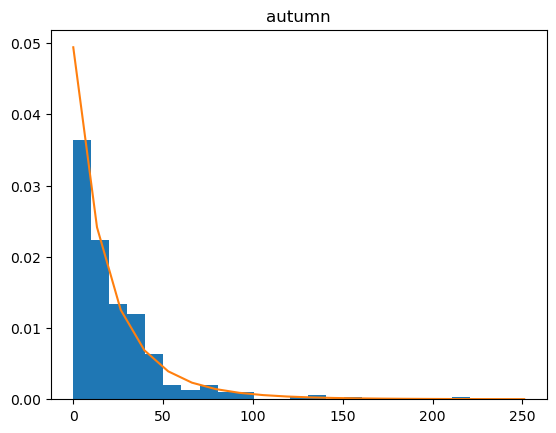

Optimization terminated successfully.
         Current function value: 1115.293378
         Iterations: 73
         Function evaluations: 136


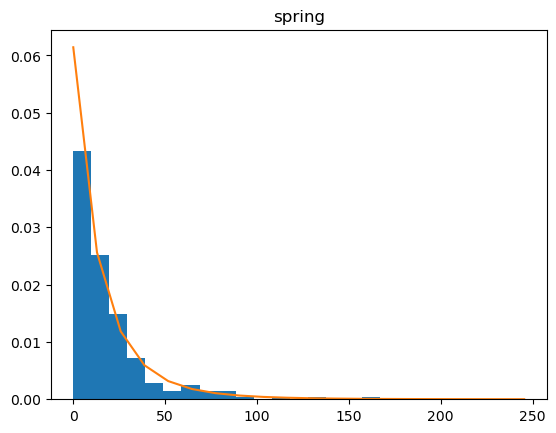

Optimization terminated successfully.
         Current function value: 1261.445939
         Iterations: 70
         Function evaluations: 132


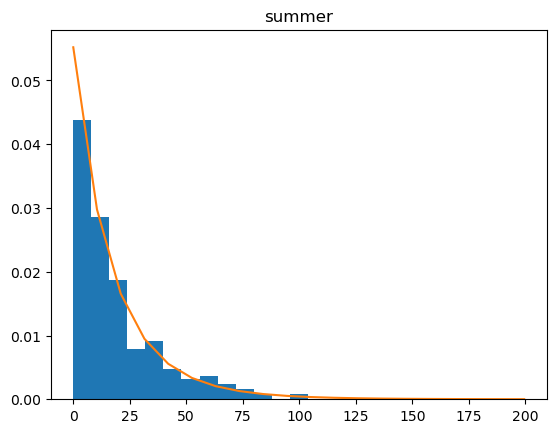

Optimization terminated successfully.
         Current function value: 802.346054
         Iterations: 73
         Function evaluations: 137


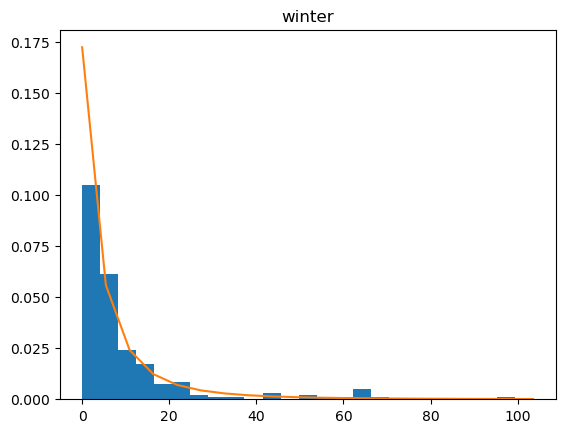

,rl_10y,rl_10y_se,rl_100y,rl_100y_se
season,,,,
autumn,177.761422,17.557954,290.543782,52.280866
spring,141.103394,16.489403,248.409589,51.486702
summer,134.066625,12.034201,206.908985,32.761516
winter,86.927328,19.245608,250.482768,97.091394


In [102]:
rl_10y = pd.Series(index = quantiles.index, dtype='float')
rl_100y = pd.Series(index = quantiles.index, dtype='float')

rl_10y_se = pd.Series(index = quantiles.index, dtype='float')
rl_100y_se = pd.Series(index = quantiles.index, dtype='float')

for season, u in quantiles.items():
    
    gpd = GPDMLE(u)
    gpd.fit(df_season[season].values)
    rl_10y.loc[season] = gpd.return_level(10.0, period = 365.25)
    rl_10y_se.loc[season] = gpd.return_level_se(10.0, period = 365.25)
    rl_100y.loc[season] = gpd.return_level(100.0, period = 365.25)
    rl_100y_se.loc[season] = gpd.return_level_se(100.0, period = 365.25)



    x = gpd.x_exceed
    xi = gpd.xi
    sigma = gpd.sigma

    x0 = 0.0
    x1 = np.quantile(x,0.999)
    x_vals = np.linspace(x0,x1,20)

    y = gpd.pdf(x_vals,xi,sigma)

    plt.hist(x,bins =25 , range = (0,x1),density=True);
    plt.plot(x_vals,y)
    plt.title(season)
    plt.show()


pd.concat([rl_10y, rl_10y_se, rl_100y, rl_100y_se], keys = ['rl_10y', 'rl_10y_se', 'rl_100y', 'rl_100y_se'], axis=1)

<AxesSubplot: xlabel='date'>

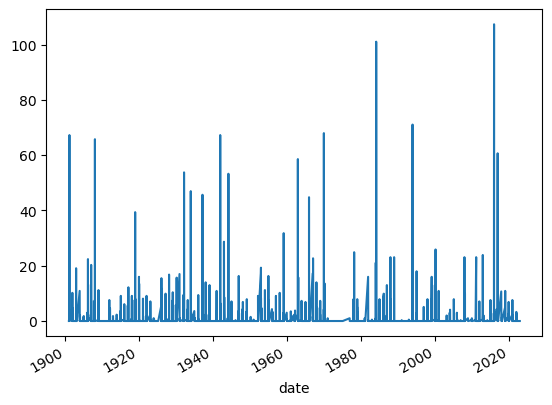

In [103]:
df_season['winter'].plot()

In [79]:
df_season['winter'].sort_values()

date
1901-01-01      0.0
1965-02-23      0.0
1965-02-22      0.0
1965-02-21      0.0
1965-02-20      0.0
              ...  
1901-02-22     67.3
1969-12-15     68.0
1993-12-08     71.1
1984-02-08    101.1
2015-12-24    107.4
Name: IN009010100, Length: 8884, dtype: float64

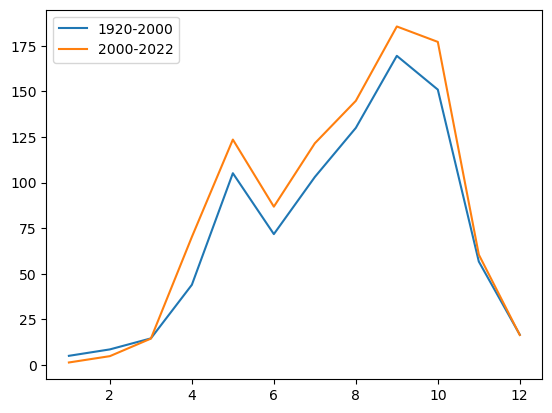

In [272]:
plt.plot(df2.loc[:'2000-01-01'].mean(),label='1920-2000')
plt.plot(df2.loc['2000-01-01':].mean(), label='2000-2022')
plt.legend()

In [98]:
def gpd_logp(x, xi, sigma, mu=0.0):
    z = (x - mu) / sigma
    return -np.log(sigma) - (1.0 + 1.0 / xi) * np.log(1.0 + xi * z)


def gpd_pdf(x, xi, sigma, mu=0.0):
    return np.exp(gpd_logp(x, xi, sigma, mu=mu))

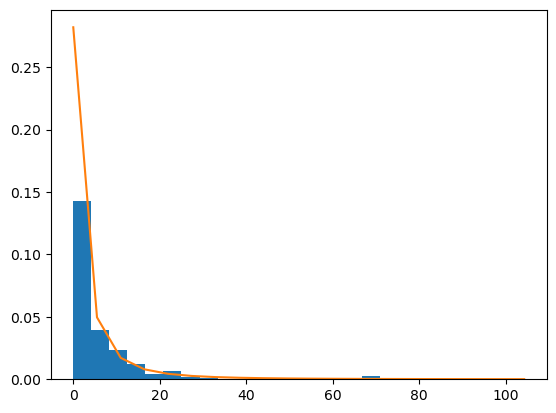

In [97]:
x = gpd.x_exceed
xi = gpd.xi
sigma = gpd.sigma

x0 = 0.0
x1 = np.quantile(x,0.999)
x_vals = np.linspace(x0,x1,20)

y = gpd_pdf(x_vals,xi,sigma)

plt.hist(x,bins =25 , range = (0,x1),density=True);
plt.plot(x_vals,y)